# HOMEWORK6_GROUP4

## Homework 6: Regression Tree Algorithm on the California Housing Dataset

- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097

##Homework 6: Regression Tree Algorithm on the California Housing Dataset

Instructions:

1. Import the dataset into a pandas DataFrame and inspect it.


This dataset provides information on the following variables:






*   MedInc: Median income for households within a block of houses (measured in tens of thousands of US Dollars).
*   HouseAge: House age; a lower number is a newer building.
*   Population: Total number of people residing within a block.
*   AveOccup: Average occupancy in houses within a block.
*   Latitude: A measure of how far north a house is; a higher value is farther north.
*   Longitude: A measure of how far west a house is; a higher value is farther west.
*   MedHouseVal: Median house value for households within a block (measured in hundreds of thousands of US Dollars).

*   AveRooms: Average number of rooms in houses within a block.
*   AveBedrms: Average number of bedrooms in houses within a block.



# The goal of this assignment is to build a regression tree and use some or all of the explanatory variables to predict the median house value.

2. Select one or more explanatory variables you would like to use by looking at the scatter plot and analyzing how each of those explanatory variables affects the target variable.

3. Split the data into training and testing sets.

4. Check for missing values in the explanatory variables you want to use.

* If there are any missing values, either delete those data instances or fill in the missing values.
* For a numerical variable, fill in the missing values with the average or median of that variable.
* For a categorical variable, fill in the missing values using the most common value.
5. Build a regression tree using the training data.

6. Inspect evaluation measures such as MAE, MSE, or RMSE.

7. Modify the tree hyper-parameters (such as criterion, max depth, min samples split, and min samples leaf) to increase the quality of the prediction. You might plot graphs showing error for different values of these parameters.

8. Use GridSearchCV(), RandomizedSearchCV(), or pruning to find the best model.

9. Compute the MAE, MSE, or RMSE for your model.

10. Determine which features are the most important in your model.

11. Take some values for the explanatory variables and use your model to predict the median house value.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Regression Tree Algo



# 1 Import the dataset into a pandas DataFrame and inspect it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn import metrics
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/Homeworks/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['housing_median_age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('housing_median_age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_rooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_rooms')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
df.shape

(20640, 10)

In [9]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [13]:
# Define the features (X) and the target (y)
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Dropping non-numerical columns
y = df['median_house_value']


# 2 Select one or more explanatory variables you would like to use by looking at the scatter plot and analyzing how each of those explanatory variables affects the target variable.



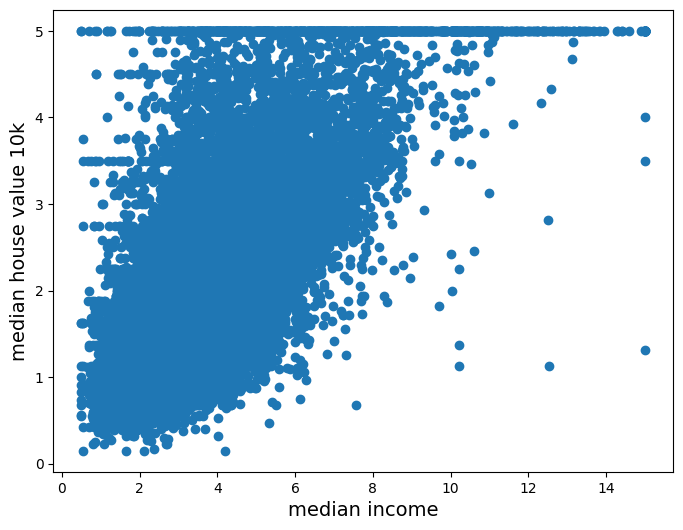

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(df['median_income'], df['median_house_value'] / 100000)
plt.xlabel('median income', fontsize=14)
plt.ylabel('median house value 10k', fontsize=14);

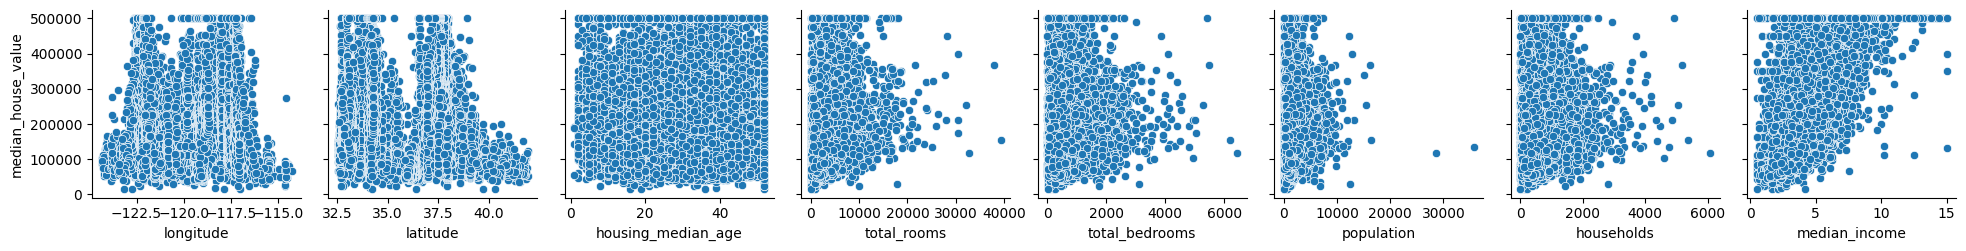

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Get a list of all numerical feature names except 'median_house_value'
x_vars = [col for col in numerical_features.columns if col != 'median_house_value']

# Create the pairplot
sns.pairplot(numerical_features, x_vars=x_vars, y_vars=['median_house_value'])
plt.show()

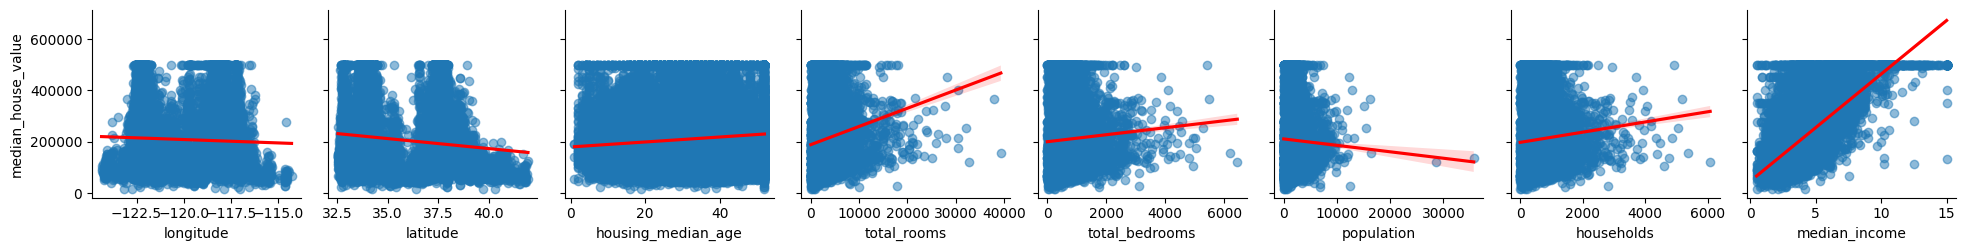

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Get a list of all numerical feature names except 'median_house_value'
x_vars = [col for col in numerical_features.columns if col != 'median_house_value']

# Create the pairplot with enhancements for better visualization
sns.pairplot(
    numerical_features,
    x_vars=x_vars,
    y_vars=['median_house_value'],
    kind='reg',  # Add regression lines for better trend visualization
    diag_kind='kde',  # Use kernel density estimation for diagonal plots
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}},  # Customize plot aesthetics
)
plt.show()

##  The scatter plots show the relationship between several explanatory variables and the target variable, median_house_value. Here are key observations for each explanatory variable:

1. Longitude and Latitude:

The first two plots represent the geographical location of houses. It seems like there are some clusters of house values in certain ranges of latitude and longitude. These variables could be significant in influencing house prices as they likely represent location-based factors (such as proximity to the BAYAREA).
2. Housing Median Age:

The third plot shows no clear linear relationship between the age of the housing and the median house value, but there are some observable patterns.
3. Total Rooms:

The scatter plot for total_rooms shows a large spread in house values for smaller room counts, with some clustering for higher room counts. Larger houses may tend to have higher values, but there isn't a very strong linear trend here.
4. Total Bedrooms:

The total number of bedrooms seems to have a pattern similar to that of total_rooms. There are clusters of high house values at different bedroom levels, but the spread is still quite wide, suggesting this variable alone may not explain house value very well.
5. Population:

The population plot shows that as population increases, there doesn't seem to be a strong trend or clear pattern impacting house value. This may indicate that population density alone isn't a good predictor of house price.
6. Households:

The number of households shows a somewhat similar trend to total_rooms and total_bedrooms, with a wide spread in values. Like the previous variables, it may not have a strong predictive power on its own.
7. Median Income:

The last scatter plot shows a clear, positive correlation between median_income and median_house_value. As income increases, the median house value also tends to rise, with some concentration in higher house values for higher income ranges. This variable appears to have the strongest relationship with house value.

**Recommended Explanatory Variables:**
## Median Income: Strong positive correlation with house value.
## Location (Longitude and Latitude): Could capture important geographical effects on house value.
## Total Rooms/Total Bedrooms: May have weaker, yet relevant influence on house prices, especially when combined with other variables.


In [20]:

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Print the correlation with the target variable
print(correlation_matrix['median_house_value'])

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64


### There is a strong correlation of median_income with the median_house_value compared to the other variables.

## 4 Check if there's missing value for selected variables

In [21]:
# Check for missing values in each column of X
missing_values_in_X = X.isnull().sum()

print(missing_values_in_X)

if missing_values_in_X.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64
There are missing values in the dataset.


In [22]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())

In [23]:
# Check for missing values in each column of X
missing_values_in_X = X.isnull().sum()

print(missing_values_in_X)

if missing_values_in_X.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64
No missing values in the dataset.


## 3 Doing train and test split

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(16512, 8)

# 5 Build a regression tree using the training data.

In [30]:
# Instantiate a Regression Tree from sklarn and fit it on the data set

regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# 6 Inspect evaluation measures such as MAE, MSE, or RMSE.

### For training data

In [31]:
# Mean Squared Error (MSE) for training data
mse_train = metrics.mean_squared_error(y_train, regressor.predict(X_train))
print(f"Training Mean Squared Error (MSE): {mse_train}")

# Mean Absolute Error (MAE) for training data
mae_train = metrics.mean_absolute_error(y_train, regressor.predict(X_train))
print(f"Training Mean Absolute Error (MAE): {mae_train}")

# Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)
print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")

Training Mean Squared Error (MSE): 0.0
Training Mean Absolute Error (MAE): 0.0
Training Root Mean Squared Error (RMSE): 0.0


### For test data

In [32]:
mse_test = metrics.mean_squared_error(y_test, regressor.predict(X_test))
print(f"Test Mean Squared Error (MSE): {mse_test}")

# Mean Absolute Error (MAE) for test data
mae_test = metrics.mean_absolute_error(y_test, regressor.predict(X_test))
print(f"Test Mean Absolute Error (MAE): {mae_test}")

# Root Mean Squared Error (RMSE) for test data
rmse_test = np.sqrt(mse_test)
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")

Test Mean Squared Error (MSE): 4801094337.203488
Test Mean Absolute Error (MAE): 44081.123062015504
Test Root Mean Squared Error (RMSE): 69289.92955115114


## The high values for MSE, MAE, and RMSE suggest that the Decision Tree model is not performing very well, with average errors in predictions being quite large.




### Given the wide range in house prices, RMSE is often more commonly used in regression problems like this because it emphasizes larger errors. However, MAE provides a clearer interpretation in terms of absolute dollars, so it depends on the goals of your model.

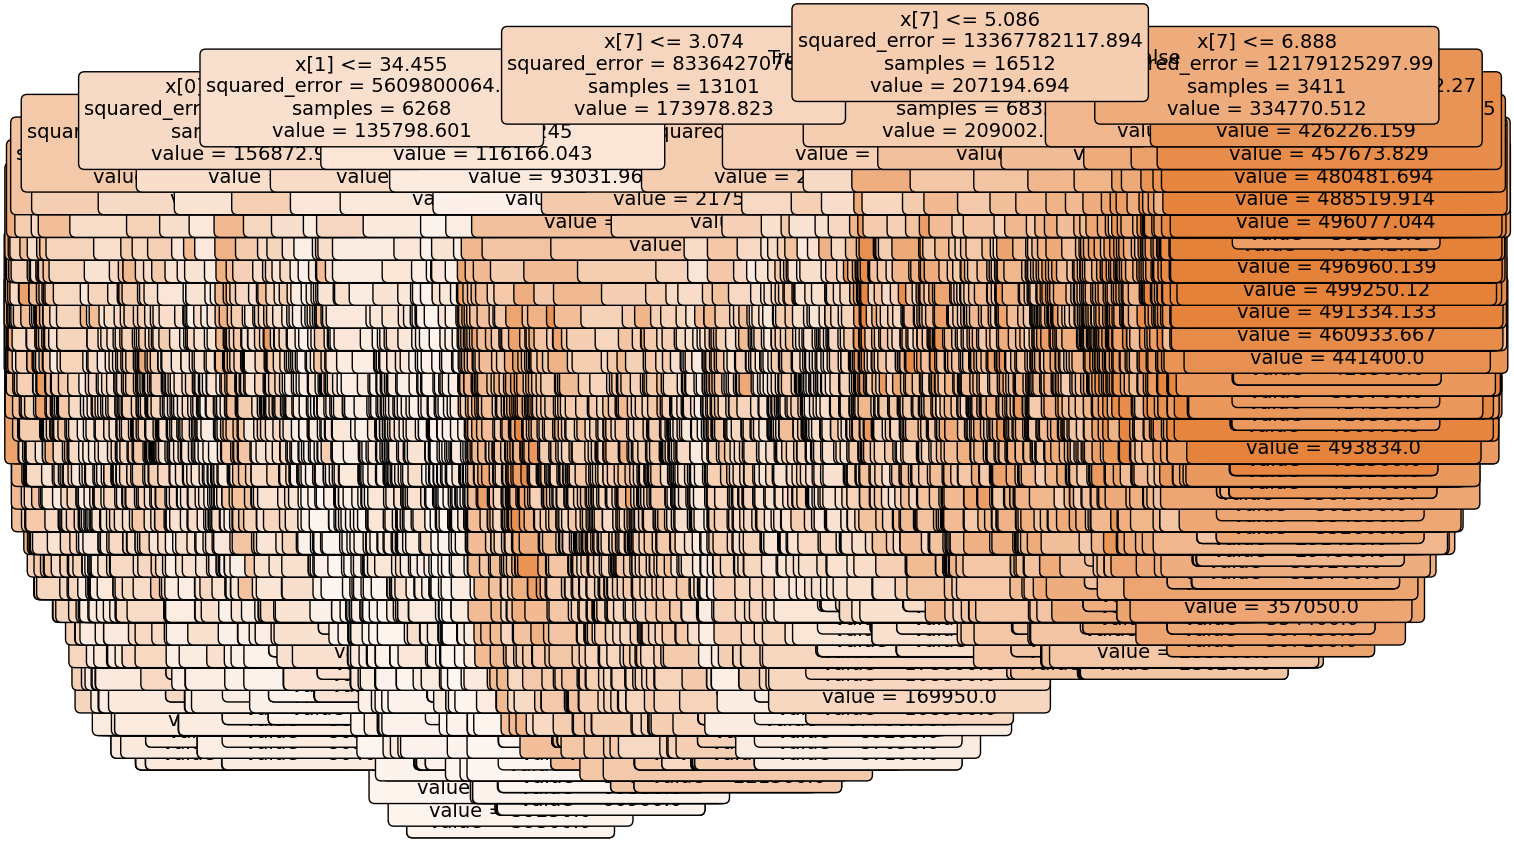

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(regressor,
               filled=True,
               rounded=True,
               fontsize=14);

### Observation: As we can see the Decision Trees overfits the training data with 0 traning error, particularly when they grow deep (i.e., make too many splits). Overfitting could cause the model to perform well on the training data but poorly on unseen test data, leading to large errors as we're observing. We might want to control the depth of the tree or use techniques like pruning to avoid overfitting.


# 7 Modify the tree hyper-parameters (such as criterion, max depth, min samples split, and min samples leaf) to increase the quality of the prediction. You might plot graphs showing error for different values of these parameters.

### Experiment with different criterion

Criterion: squared_error
Train MSE: 2432324175.379059
Test MSE: 3862202282.713479

Criterion: absolute_error
Train MSE: 2687204938.4658127
Test MSE: 3567445038.86852



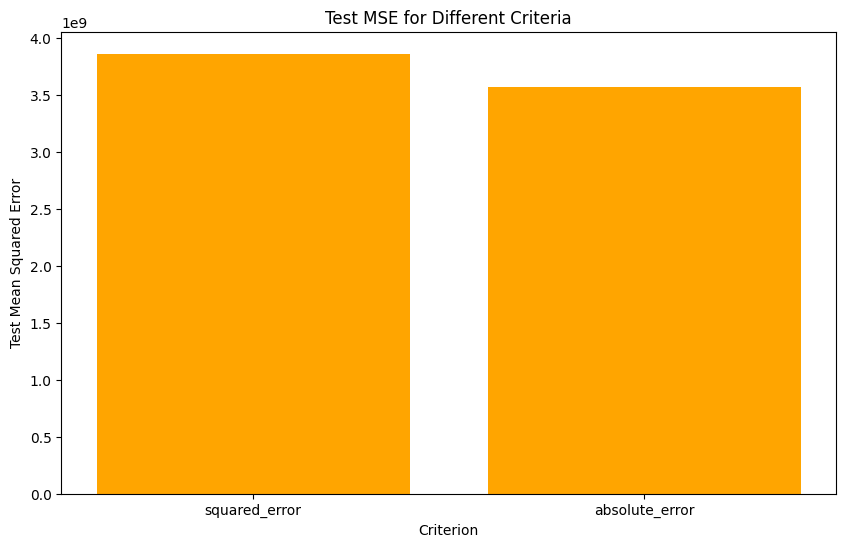

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the possible criteria
criteria = ['squared_error', 'absolute_error',]

# Lists to store performance metrics for each criterion
train_errors = []
test_errors = []

# Loop over each criterion
for criterion in criteria:
    # Initialize the DecisionTreeRegressor with the current criterion
    regressor = tree.DecisionTreeRegressor(criterion=criterion, random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=5)

    # Train the model
    regressor.fit(X_train, y_train)

    # Predictions on the training and test sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate the MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Print the results
    print(f"Criterion: {criterion}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}\n")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(criteria, test_errors, color='orange')
plt.title('Test MSE for Different Criteria')
plt.xlabel('Criterion')
plt.ylabel('Test Mean Squared Error')
plt.show()


### From observation,using criterion of "abosolute value " make the test error smaller

### Experiment with hyperparameters max_depth

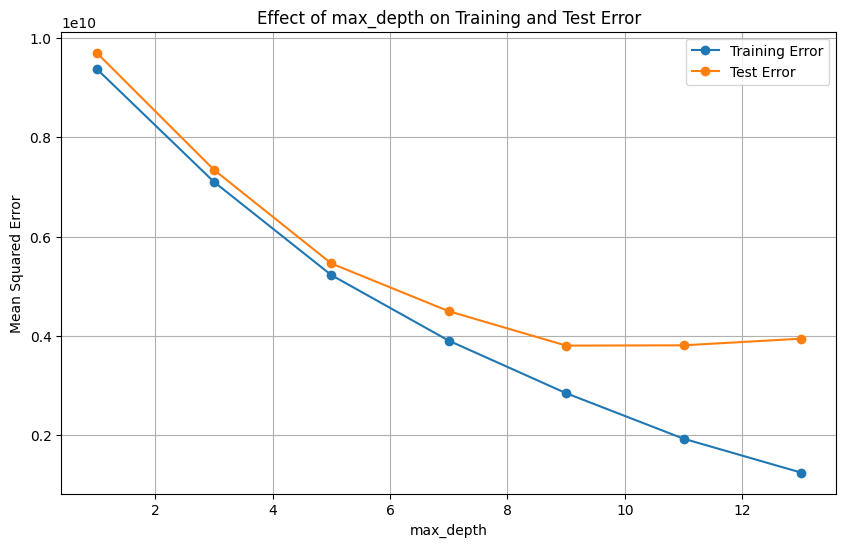

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize lists to store results
depths = range(1, 15,2)
train_errors = []
test_errors = []

# Loop over different values for `max_depth`
for max_depth in depths:
    regressor = tree.DecisionTreeRegressor(criterion= 'absolute_error', max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)

    # Make predictions
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate the Mean Squared Error (MSE) for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training Error', marker='o')
plt.plot(depths, test_errors, label='Test Error', marker='o')
plt.title('Effect of max_depth on Training and Test Error')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


## Optimal max_depth: Around 9 seems to be the optimal max_depth for this Decision Tree model. At this depth, the test error is at its lowest, indicating a good balance between underfitting and overfitting.
## Overfitting: As max_depth increases beyond 9, the training error continues to decrease, but the test error plateaus, showing that the model is starting to memorize the training data rather than learning patterns that generalize to new data.
## Underfitting: At very low depths (e.g., max_depth = 2), both training and test errors are high, indicating that the model is too simple and underfitting the data.

## Effect of min_samples_split

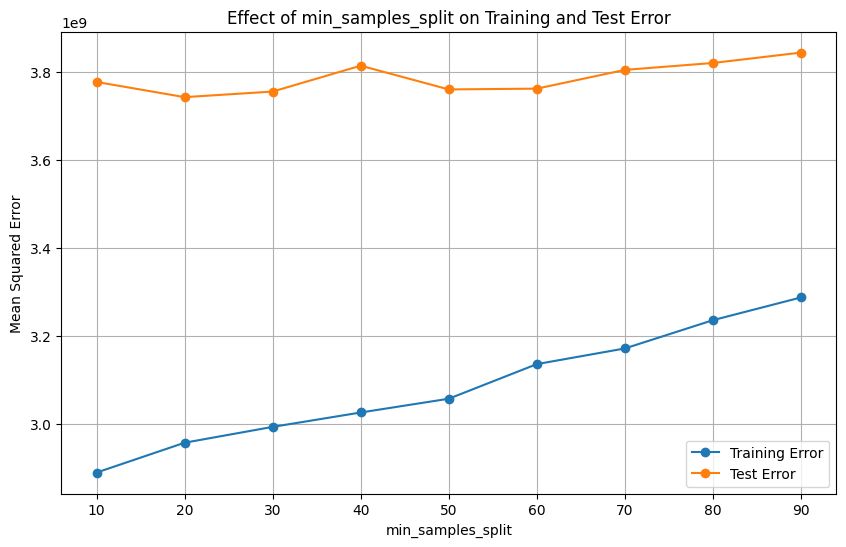

In [35]:
splits = range(10, 100, 10)
train_errors = []
test_errors = []

# Loop over different values for `min_samples_split`
for min_split in splits:
    regressor = tree.DecisionTreeRegressor(criterion= 'absolute_error',min_samples_split=min_split, max_depth= 9 , random_state=42)
    regressor.fit(X_train, y_train)

    # Make predictions
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate the MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(splits, train_errors, label='Training Error', marker='o')
plt.plot(splits, test_errors, label='Test Error', marker='o')
plt.title('Effect of min_samples_split on Training and Test Error')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


### Experiment with hyperparamters min samples leaf

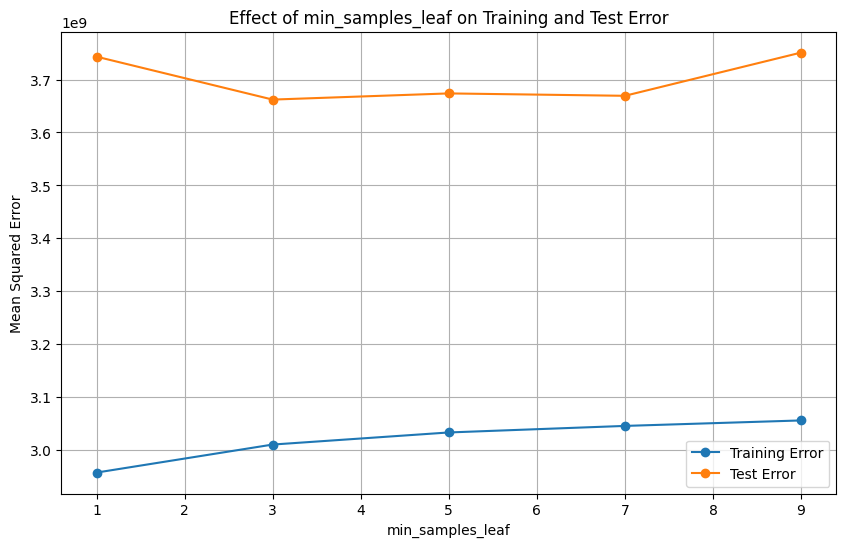

In [37]:
leaves = range(1, 10,2 )
train_errors = []
test_errors = []

# Loop over different values for `min_samples_leaf`
for min_leaf in leaves:
    regressor = tree.DecisionTreeRegressor(criterion= 'absolute_error',min_samples_leaf=min_leaf, min_samples_split= 20, max_depth=9, random_state=42)
    regressor.fit(X_train, y_train)

    # Make predictions
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate the MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(leaves, train_errors, label='Training Error', marker='o')
plt.plot(leaves, test_errors, label='Test Error', marker='o')
plt.title('Effect of min_samples_leaf on Training and Test Error')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


## 8  Use GridSearchCV(), RandomizedSearchCV(), or pruning to find the best model.
## 9 Compute the MAE, MSE, or RMSE for your model.



In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the hyperparameter distribution
param_grid = {
    'criterion': ['absolute_error'],  # Use fewer criteria
    'max_depth': [6, 15],           # Narrow the range for max_depth
    'min_samples_split': [5, 10],    # Narrow the values for min_samples_split
    'min_samples_leaf': [5, 10]      # Narrow the values for min_samples_leaf
}
# Initialize the DecisionTreeRegressor
regressor = tree. DecisionTreeRegressor(random_state=42)

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                          cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator (model with the best parameters)
best_model = grid_search.best_estimator_

# Get the best parameters and best score (RMSE)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate MSE
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

# Evaluate MAE
test_mae = mean_absolute_error(y_test, y_test_pred)

# Evaluate RMSE (convert MSE to RMSE)
test_rmse = np.sqrt(test_mse)

# Print the evaluation metrics

print(f"Best MSE: {test_mse}")
print(f"Best MAE: {test_mae}")
print(f"Best RMSE: {test_rmse}")



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best MSE: 3406256637.801175
Best MAE: 36691.73776647287
Best RMSE: 58363.14451604861


##  Use RandomizedSearchCV to find the best model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distribution
param_dist = {
     'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [5, 10, 15,20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

# Instantiate the randomized search
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, verbose=1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
# Get the best parameters and best score (RMSE)
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate MSE
test_mse = mean_squared_error(y_test, y_test_pred)

# Evaluate RMSE (convert MSE to RMSE)
test_rmse = np.sqrt(test_mse)

# Evaluate MAE
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Best RMSE: {test_rmse}")
print(f"Best MSE: {test_mse}")
print(f"Best MAE: {test_mae}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 15, 'criterion': 'absolute_error'}
Best RMSE: 58311.769210655446
Best MSE: 3400262428.476744
Best MAE: 36750.145833333336


## Using pruning to reduce overfitting

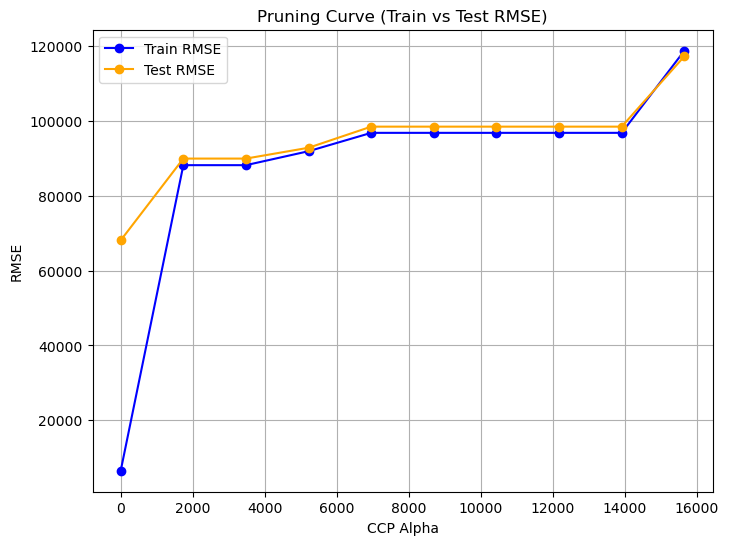

Best CCP Alpha: 0.0


In [ ]:


from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Instantiate a decision tree regressor with 'absolute_error' criterion
regressor = tree.DecisionTreeRegressor(
    criterion='absolute_error',
    random_state=42
)

# Get the cost complexity pruning path (ccp_alphas is the parameter for pruning)
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Generate 10 evenly spaced values of ccp_alpha, ensuring the minimum is 0
ccp_alphas = np.linspace(0, max(ccp_alphas), num=10)

# Initialize lists to store the train and test RMSE scores
train_rmse_scores = []
test_rmse_scores = []

# Loop over different values of ccp_alpha and train models to find the best one
for ccp_alpha in ccp_alphas:
    # Set the current ccp_alpha value
    regressor.set_params(ccp_alpha=ccp_alpha)

    # Fit the model to the training data
    regressor.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate RMSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Calculate RMSE (square root of MSE)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Append RMSE scores
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

# Plot train and test RMSE scores to find the best pruning parameter
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_rmse_scores, label="Train RMSE", marker='o', color="blue")
plt.plot(ccp_alphas, test_rmse_scores, label="Test RMSE", marker='o', color="orange")
plt.xlabel("CCP Alpha")
plt.ylabel("RMSE")
plt.title("Pruning Curve (Train vs Test RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# Identify the best alpha that balances train and test performance (lowest test RMSE)
best_ccp_alpha = ccp_alphas[np.argmin(test_rmse_scores)]
print(f"Best CCP Alpha: {best_ccp_alpha}")



# 10 Determine which features are the most important in your model.

Feature Importances:
median_income: 0.4939
latitude: 0.2197
longitude: 0.2169
housing_median_age: 0.0379
total_rooms: 0.0110
population: 0.0108
total_bedrooms: 0.0060
households: 0.0038


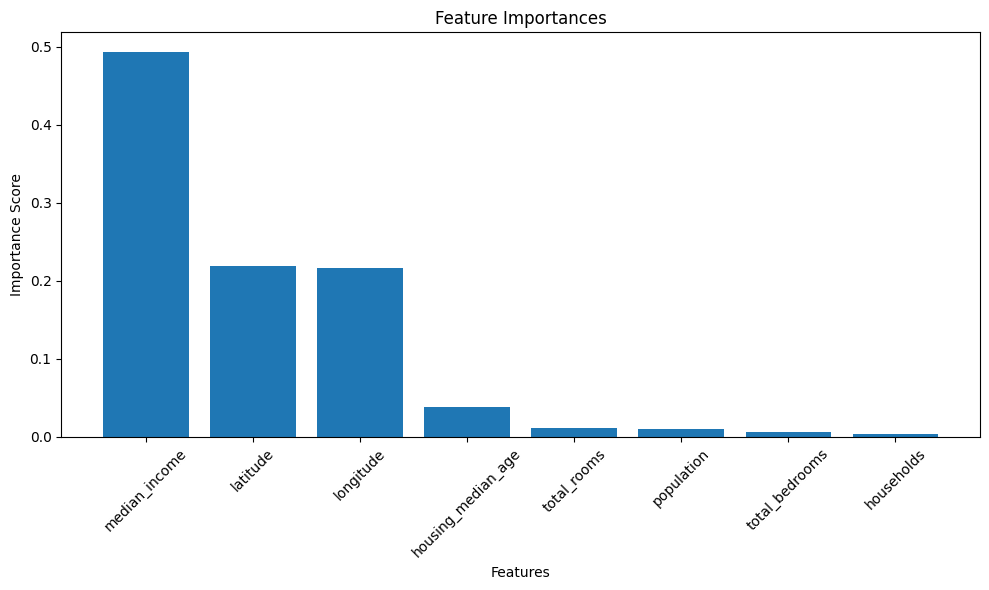

In [40]:
# Best parameters from your search
best_params = {
    'min_samples_split': 15,
    'min_samples_leaf': 15,
    'max_depth': 15,
    'criterion': 'absolute_error'
}

# Initialize the DecisionTreeRegressor with the best parameters
regressor = tree. DecisionTreeRegressor(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42  # Ensures reproducibility
)

# Fit the regressor to your training data
regressor.fit(X_train, y_train)


# Get the feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Get feature importances from the trained decision tree model
feature_importances = regressor.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature importance values
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()



# Like initially observed we got:
## Median Income: Strong positive correlation with house value.
## (Longitude and Latitude): Could capture important geographical effects on house value.
## Housing_median_age & Total Rooms/Total Bedrooms: May have weaker, yet relevant influence on house prices, especially when combined with other variables.

# 11 Take some values for the explanatory variables and use your model to predict the median house value.

In [41]:


means = X_train.mean()
stds = X_train.std()

# Number of new data points to generate
n_samples = 10

# Generate unseen data by sampling from the normal distribution of each feature
new_data = np.random.normal(loc=means, scale=stds, size=(n_samples, X_train.shape[1]))

# Convert the new data into a DataFrame (with the same column names as X_train)
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)
print("Generated Unseen Data :")
# Print the generated unseen data
print(new_data_df)
# Use the trained regressor to make predictions on the generated unseen data
predictions = regressor.predict(new_data_df)

# Print the predictions for the unseen data
print("\nPredictions of median house value for the Unseen Data:")
print(predictions)



Generated Unseen Data :
    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -119.566036  31.929665           13.636318  -350.231116      183.894908   
1 -121.894488  38.096607           43.178776  2151.917691      362.877705   
2 -120.999362  31.408314           21.995304 -1578.698728      230.836666   
3 -118.114981  35.303394           13.560680  2967.594414      432.763262   
4 -120.729636  32.564436           32.174795  -387.911999      742.783535   
5 -116.640209  34.348135           12.396875  -167.094563     -219.904255   
6 -112.589326  34.782908           33.561266  3892.588777      133.211573   
7 -117.758945  32.512018           31.722892   780.010793      527.186794   
8 -120.812506  37.274029           29.824944  3059.850622      339.505347   
9 -120.026755  34.891761           15.806764  2910.177378      310.729941   

    population   households  median_income  
0   332.271328   527.028841       4.216376  
1  -483.917865  -225.123741       2.64